### Simple Linear Regression using Least square method

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# creating dataset
data = {'Y':[245, 312, 279, 308, 199, 219, 405, 324, 319, 255],
        'X':[1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]}
df = pd.DataFrame(data)

In [3]:
# reshaping the dataset to fit in the model
x = df.X
y = df.Y
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [4]:
# scaling the independent variable
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = np.insert(x_scaled, 0, values=1,axis=1)

In [5]:
# returns coefficient of the best fitting regression line
# formula used:
# beta= (x.(x^T))^(-1).(x^T).y
def coefficients(x_scaled, y):
    return (np.linalg.inv(x_scaled.T.dot(x_scaled))).dot(x_scaled.T).dot(y)

In [6]:
# regression line intercept and slope for the given dataset
beta = coefficients(x_scaled, y)
print('Intercept:{}\nSlope:{}'.format(beta[0], beta[1]))

Intercept:[286.5]
Slope:[43.5142905]


In [7]:
# predictions
x_pred = np.array([3000, 2000, 1500])
x_pred=x_pred.reshape(-1,1)
x_pred = scaler.fit_transform(x_pred)
x_pred = np.insert(x_pred, 0, values=1,axis=1)
y_predict = x_pred.dot(beta)
print('x = 3000, y = {}\nx = 2000, y = {}\nx = 1500, y ={}'.format(*y_predict))

x = 3000, y = [344.6484166]
x = 2000, y = [274.87031668]
x = 1500, y =[239.98126672]


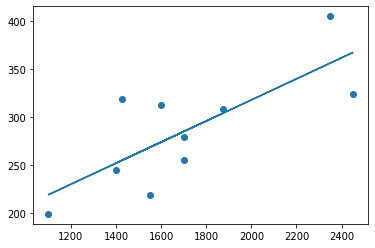

In [8]:
# scatterplot and regression line
plt.scatter(x, y)
y_preds = [beta[0] + beta[1] *i for i in x_scaled[:, 1]]
plt.plot(x, y_preds)
plt.show()

In [9]:
# performance evaluation
error = y - y_preds
square_error = np.power(error,2)
mse = sum(square_error)/len(y)
rms = np.sqrt(mse)
y_mean = np.mean(y)
var = np.sum((y-y_mean)**2)
r = 1 - sum(square_error)/var
print('Mean square error: {}\nRoot Mean Square error: {}\nR2 Score: {}'.format(mse[0],rms[0],r[0]))

Mean square error: 1366.556522430798
Root Mean Square error: 36.96696528565467
R2 Score: 0.5808173118722725


### Multiple Linear Regression using Least Square Method 

In [10]:
# create dataset
data = {'Year':[2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
        'Month':[12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1,12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'Interest_Rate':[2.75, 2.5, 2.5, 2.5, 2.5, 2.5,2.5, 2.25, 2.25, 2.25, 2, 2, 2, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75],
        'Unemployment_Rate': [5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 6, 5.9, 5.8, 6.1, 6.2, 6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'Stock_Index_Price':[1464, 1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
        
       }
df = pd.DataFrame(data)
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [11]:
# scaling and transforming
x = df.iloc[:,:-1]
x = np.array(x)
x_scaled = scaler.fit_transform(x)
x_scaled = np.insert(x_scaled, 0, values=1,axis=1)
x_scaled

array([[ 1.        ,  1.        ,  1.59325501,  1.97880334, -1.47026414],
       [ 1.        ,  1.        ,  1.30357228,  1.24816826, -1.47026414],
       [ 1.        ,  1.        ,  1.01388955,  1.24816826, -1.47026414],
       [ 1.        ,  1.        ,  0.72420682,  1.24816826, -1.47026414],
       [ 1.        ,  1.        ,  0.43452409,  1.24816826, -1.16073485],
       [ 1.        ,  1.        ,  0.14484136,  1.24816826, -0.54167626],
       [ 1.        ,  1.        , -0.14484136,  1.24816826, -0.85120556],
       [ 1.        ,  1.        , -0.43452409,  0.51753318, -0.85120556],
       [ 1.        ,  1.        , -0.72420682,  0.51753318, -0.85120556],
       [ 1.        ,  1.        , -1.01388955,  0.51753318, -0.54167626],
       [ 1.        ,  1.        , -1.30357228, -0.2131019 , -0.23214697],
       [ 1.        ,  1.        , -1.59325501, -0.2131019 ,  0.38691162],
       [ 1.        , -1.        ,  1.59325501, -0.2131019 ,  0.69644091],
       [ 1.        , -1.        ,  1.3

In [12]:
y = df.Stock_Index_Price
y = np.array(y)
y = y.reshape(-1,1)

In [13]:
# regression coefficients for the dataset
beta = coefficients(x_scaled, y)

print('beta 1: {}'.format(beta[0]))
print('beta 2: {}'.format(beta[1]))
print('beta 3: {}'.format(beta[2]))
print('beta 4: {}'.format(beta[3]))
print('beta 5: {}'.format(beta[4]))

beta 1: [1070.08333333]
beta 2: [169.13407143]
beta 3: [96.04977006]
beta 4: [24.60949865]
beta 5: [14.56927777]


In [14]:
# prediction 

y_pred = beta[0] + beta[-1]*5.8 + beta[-2]*1.5
print('y is {} for interest rate 1.5 and unemplyment rate 5.8'.format(y_pred))

y is [1191.49939239] for interest rate 1.5 and unemplyment rate 5.8


In [15]:
# performance evaluation
beta=np.array(beta).reshape(-1,1)
y_preds=x_scaled.dot(beta)
error = y - y_preds
square_error = np.power(error,2)
mse = sum(square_error)/len(y)
rms = np.sqrt(mse)
y_mean = np.mean(y)
var = np.sum((y-y_mean)**2)
r = 1 - sum(square_error)/var
print('Mean square error: {}\nRoot Mean Square error: {}\nR2 Score: {}'.format(mse[0],rms[0],r[0]))

Mean square error: 923.6388149319869
Root Mean Square error: 30.39142666825608
R2 Score: 0.9782974467058868
